In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# conn = 'mongodb://localhost:27018'
# client = pymongo.MongoClient(conn)

In [3]:
# db = client.eliteprospects

# metadata = db.meta_data
# player_stats = db.player_data
# award_stats = db.awards_data

# meta = pd.DataFrame(list(metadata.find()))
# players = pd.DataFrame(list(player_stats.find()))
# awards = pd.DataFrame(list(award_stats.find()))

In [4]:
main = pd.read_csv('main_test.csv').drop('Unnamed: 0', 1)

In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 72 columns):
height                  595 non-null int64
weight                  595 non-null int64
regular_gp_14           595 non-null float64
regular_g_14            595 non-null float64
regular_a_14            595 non-null float64
regular_pim_14          595 non-null float64
regular_pm_14           595 non-null float64
playoffs_gp_14          595 non-null float64
playoffs_g_14           595 non-null float64
playoffs_a_14           595 non-null float64
playoffs_pim_14         595 non-null float64
playoffs_pm_14          595 non-null float64
regular_gp_15           595 non-null float64
regular_g_15            595 non-null float64
regular_a_15            595 non-null float64
regular_pim_15          595 non-null float64
regular_pm_15           595 non-null float64
playoffs_gp_15          595 non-null float64
playoffs_g_15           595 non-null float64
playoffs_a_15           595 non-null float64

### Response

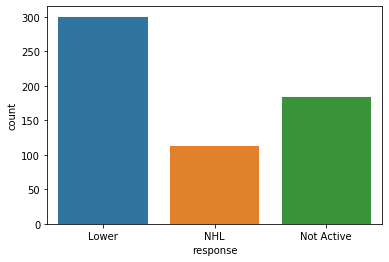

In [8]:
sns.countplot(main['response'])

### Height (cm)

In [6]:
main['height']

0      175
1      174
2      190
3      179
4      188
      ... 
590    188
591    186
592    181
593    183
594    185
Name: height, Length: 595, dtype: int64

In [15]:
main['height'].describe()

count    595.000000
mean     184.053782
std        5.514334
min      168.000000
25%      180.000000
50%      184.000000
75%      188.000000
max      200.000000
Name: height, dtype: float64

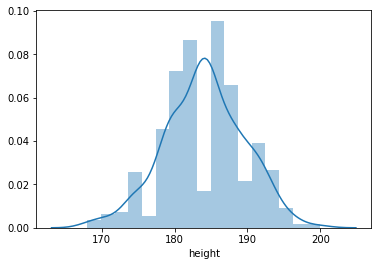

In [10]:
sns.distplot(main['height'])

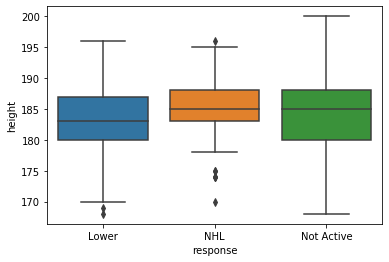

In [7]:
sns.boxplot(main['response'], main['height'])

### Weight (kg)

In [11]:
main['weight']

0      84
1      76
2      88
3      87
4      93
       ..
590    89
591    79
592    79
593    89
594    94
Name: weight, Length: 595, dtype: int64

In [16]:
main['weight'].describe()

count    595.000000
mean      87.959664
std        6.029254
min       65.000000
25%       84.000000
50%       88.000000
75%       93.000000
max       99.000000
Name: weight, dtype: float64

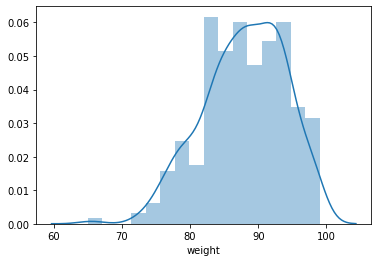

In [12]:
sns.distplot(main['weight'])

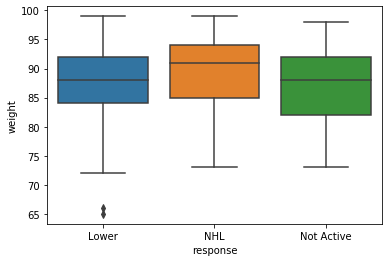

In [13]:
sns.boxplot(main['response'], main['weight'])

### Height ~ Weight

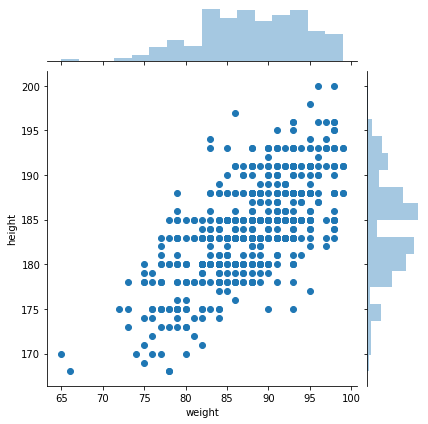

In [14]:
sns.jointplot(main['weight'], main['height'])

### Age 14

In [18]:
age_14 = [
    'regular_gp_14', 'regular_g_14', 'regular_a_14', 'regular_pim_14', 'regular_pm_14',
    'playoffs_gp_14', 'playoffs_g_14', 'playoffs_a_14', 'playoffs_pim_14', 'playoffs_pm_14'
]

age14 = main[age_14]

In [19]:
age14.describe()

,regular_gp_14,regular_g_14,regular_a_14,regular_pim_14,regular_pm_14,playoffs_gp_14,playoffs_g_14,playoffs_a_14,playoffs_pim_14,playoffs_pm_14
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2.515966,1.292437,1.576471,2.963025,-0.040336,0.117647,0.065546,0.057143,0.077311,-0.001681
std,9.203333,6.355241,7.001836,13.146237,0.497522,0.919087,0.664699,0.580342,0.787576,0.040996
min,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,95.000000,92.000000,127.000000,0.000000,11.000000,11.000000,11.000000,12.000000,0.000000


### Age 15

In [21]:
age_15 = [
    'regular_gp_15', 'regular_g_15', 'regular_a_15', 'regular_pim_15', 'regular_pm_15',
    'playoffs_gp_15', 'playoffs_g_15', 'playoffs_a_15', 'playoffs_pim_15', 'playoffs_pm_15'
]

age15 = main[age_15]

In [22]:
age15.describe()

,regular_gp_15,regular_g_15,regular_a_15,regular_pim_15,regular_pm_15,playoffs_gp_15,playoffs_g_15,playoffs_a_15,playoffs_pim_15,playoffs_pm_15
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,9.315966,6.104202,6.865546,10.205042,0.336134,0.505882,0.282353,0.321008,0.626891,0.008403
std,17.876333,14.866949,15.453811,24.053076,2.635798,1.838940,1.418116,1.437642,3.368294,0.480176
min,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,120.000000,89.000000,174.000000,28.000000,12.000000,15.000000,11.000000,46.000000,10.000000
